In [121]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from scipy.spatial.distance import cdist

In [115]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
transform=transforms.Compose([
                           transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
sc_X = StandardScaler()




def fileFeedforGNN(name):

  data = pd.read_table(name)
  X_array = data.iloc[:, 0:16].values

  # X_array = sc_X.fit_transform(X_array)
  # df = pd.DataFrame(data = X_array)

 
  adding_process_list = []
    
  #num_objects	r_std	r_var	r_mean	r_min	r_max	snr_std	snr_var	snr_mean	snr_min	snr_max	noise_std	noise_var	noise_mean	noise_min	noise_max	obj	environment	
  
  for i in range(len(data)- 27):
    X_array = data.iloc[i:i+28, 0:16].values
  
    adding_process_list.append(X_array)
  
  
  

  y = data.iloc[:,-3].values
  
  
  print(np.unique(y))


  graphList = []
  X = adding_process_list
  for i in range(len(X)):
    interList = []
    
    for j in range(len(X[i])):
      
      for k in range(len(X[i][j])):
        interList.append(X[i][j][k])
      interList+=[X[i][j][1],X[i][j][2],X[i][j][3],X[i][j][5],X[i][j][6],X[i][j][7],X[i][j][8],X[i][j][10],X[i][j][11],X[i][j][12],X[i][j][13],X[i][j][15]]
    int_array = np.array(interList)
    int_array = int_array.reshape(28,28)

    #print(int_array.reshape(28,28).shape)

    

    if(y[i] =='bot'):
      graphList.append((transform(int_array),0))
    elif (y[i] == 'clothes'):
      graphList.append((transform(int_array),1))
    elif (y[i] == 'plastic'):
      graphList.append((transform(int_array),2))
    elif (y[i] == 'steel'):
      graphList.append((transform(int_array),3))
  
  return graphList


############################## data loading for 3.5 inch#####################

graphList_lablight_3_5 = fileFeedforGNN('lablight_3.5_.txt')
graphList_night_3_5 = fileFeedforGNN('night_3.5_.txt')
graphList_sunny_3_5 = fileFeedforGNN('sunny_3.5_.txt')


lablight_train_len = int(len(graphList_lablight_3_5)*0.7)
night_train_len = int(len(graphList_night_3_5)*0.7)
sunny_tarin_len = int(len(graphList_sunny_3_5)*0.7)


batch_size=64
test_batch_size=64

random.shuffle(graphList_lablight_3_5)
random.shuffle(graphList_night_3_5)
random.shuffle(graphList_sunny_3_5)

train_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[0:lablight_train_len],batch_size)  
test_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[lablight_train_len:],test_batch_size) 

train_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[0:night_train_len],batch_size)  
test_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[night_train_len:],test_batch_size) 

train_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[0:sunny_tarin_len],batch_size)  
test_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[sunny_tarin_len:],test_batch_size) 

print(len(graphList_lablight_3_5))
print(len(graphList_night_3_5))
print(len(graphList_sunny_3_5))



############################## data loading for 7 inch#####################

graphList_lablight_7= fileFeedforGNN('lablight_7_.txt')
graphList_night_7 = fileFeedforGNN('night_7_.txt')
graphList_sunny_7 = fileFeedforGNN('sunny_7_.txt')


lablight_train_len = int(len(graphList_lablight_7)*0.7)
night_train_len = int(len(graphList_night_7)*0.7)
sunny_tarin_len = int(len(graphList_sunny_7)*0.7)


batch_size=64
test_batch_size=64

random.shuffle(graphList_lablight_7)
random.shuffle(graphList_night_7)
random.shuffle(graphList_sunny_7)

train_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[0:lablight_train_len],batch_size)  
test_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[lablight_train_len:],test_batch_size) 

train_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[0:night_train_len],batch_size)  
test_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[night_train_len:],test_batch_size) 

train_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[0:sunny_tarin_len],batch_size)  
test_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[sunny_tarin_len:],test_batch_size) 

print(len(graphList_lablight_7))
print(len(graphList_night_7))
print(len(graphList_sunny_7))


['bot' 'clothes' 'plastic' 'steel']
['bot' 'clothes' 'plastic' 'steel']
['bot' 'clothes' 'plastic' 'steel']
4189
3680
3667
['bot' 'clothes' 'plastic' 'steel']
['bot' 'clothes' 'plastic' 'steel']
['bot' 'clothes' 'plastic' 'steel']
3957
3908
3550


In [120]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 




class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, 3)
        # self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 16, 3)
        self.conv3 = nn.Conv2d(16, 16, 3)
        #self.conv4 = nn.Conv2d(16, 16, 3)
        
        self.fc1 = nn.Linear(16 * 22 * 22, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = F.relu(self.conv1(x))
    
        x = F.relu(self.conv2(x))  
    
        
        x = F.relu(self.conv3(x))
        #x = F.relu(self.conv4(x))
        
        x = x.view(-1, 16*22*22)            # -> n, 400
        
        
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                      # -> n, 10
        return x


def testAccuracy(model,test_loader):  
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        n_class_correct = [0 for i in range(class_labels)]
        n_class_samples = [0 for i in range(class_labels)]
        for images, labels in test_loader:

            #images = images.FloatTensor()
            images = images.to(device).float()
            labels = labels.to(device)
            outputs = model(images)
            # max returns (value ,index)
            _, predicted = torch.max(outputs, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

            for i in range(len(labels)):
                label = labels[i]
                pred = predicted[i]
                if (label == pred):
                    n_class_correct[label] += 1
                n_class_samples[label] += 1
        
        
        print('testing accuracy')

        total_acc = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network: {total_acc} %')


        for i in range(class_labels):
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of {classes[i]}: {acc} %')
        
        return total_acc

    
def modelTrainer(train_loader,test_loader):
    
    num_epochs = 20
    batch_size = 64
    learning_rate = 0.001

    class_labels = 4

    #train_loader, test_loader = train_loader_lablight_3_5,test_loader_lablight_3_5 


    print(len(train_loader)*64)

    classes = ('bot', 'clothes', 'plastic', 'steel')

    # get some random training images
    dataiter = iter(train_loader)
    images, labels = next(dataiter)

    model = ConvNet().to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


    bestaccuracy = 0
    bestepoch = 0

    accList = []
    lossList = []

    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # origin shape: [4, 3, 32, 32] = 4, 3, 1024
            # input_layer: 3 input channels, 6 output channels, 5 kernel size
            
            print(images.shape)

            #images = images.float()
            images = images.to(device).float()
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
       

        print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
        accuracy = testAccuracy(model,test_loader)

        accList.append(accuracy)
        lossList.append(loss.item())

        if(bestaccuracy < accuracy):
            bestaccuracy = accuracy
            bestepoch = epoch
            PATH = './cnn.pth'
            torch.save(model.state_dict(), PATH)


    print('Finished Training')
  

    print(bestaccuracy)
    print(bestepoch)
    
    return accList,lossList



print("7")
print("train lablight and test lablight")

accList,lossList = modelTrainer(train_loader_lablight_7,test_loader_lablight_7)
# print("train lablight and test night")
# mainTrainer(train_loader_lablight_7,test_loader_night_7)
# print("train lablight and test sunny")
# mainTrainer(train_loader_lablight_7,test_loader_sunny_7)
# print("train night and test night")
# mainTrainer(train_loader_night_7,test_loader_night_7)
# print("train night and test lablight")
# mainTrainer(train_loader_night_7,test_loader_lablight_7)
# print("train night and test sunny")
# mainTrainer(train_loader_night_7,test_loader_sunny_7)
# print("train sunny and test sunny")
# mainTrainer(train_loader_sunny_7,test_loader_sunny_7)
# print("train sunny and test night")
# mainTrainer(train_loader_sunny_7,test_loader_night_7)
# print("train sunny and test lablight")
# mainTrainer(train_loader_sunny_7,test_loader_lablight_7)




7
train lablight and test lablight
2816
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Si

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


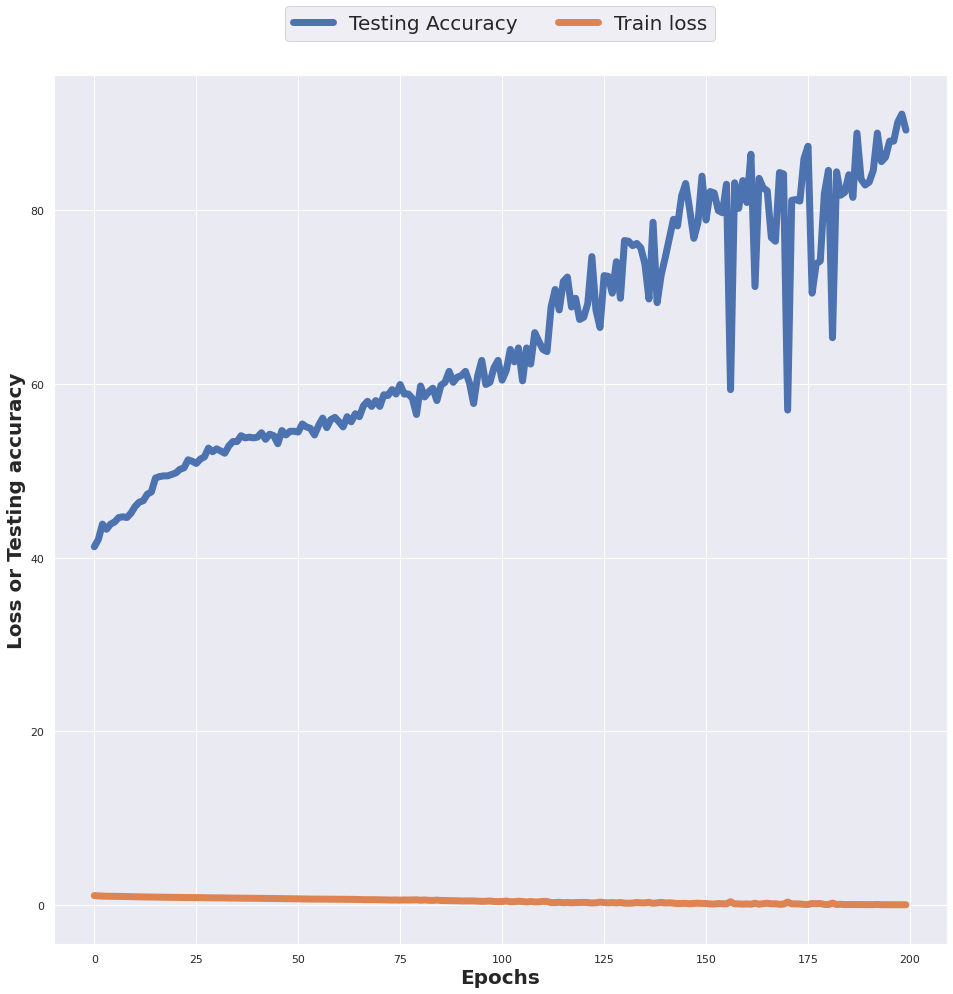

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = [i for i in range(200)]


sns.set(rc={'figure.figsize':(16,16) },font_scale=1)
fig, ax0 = plt.subplots(1, 1)

y1 = accList

    #print(y)
var = 7

# plotting strip plot with seaborn
sns.lineplot(x, y1,ax=ax0,linewidth = var)


y2 = lossList
#print(y)

sns.lineplot(x, y2, ax = ax0,linewidth = var)

# giving labels to x-axis and y-axis
ax0.set(xlabel ='Epochs', ylabel ='Loss or Testing accuracy')

ax0.set_xlabel(ax0.get_xlabel(), fontdict={'weight': 'bold'}, fontsize = 20)
ax0.set_ylabel(ax0.get_ylabel(), fontdict={'weight': 'bold'},fontsize = 20)
ax0.legend(['Testing Accuracy', 'Train loss'],fontsize = 20,loc='upper center',bbox_to_anchor=(0.5, 1.09),
ncol=2)

plt.savefig('lablight'+'.PNG', bbox_inches = "tight")
    

In [57]:
!pip3 install seaborn

     |████████████████████████████████| 292 kB 14.9 MB/s            
